# Computational Techniques for Data Science
## Module 3
## Stephen Korir
## 193218
## Week 6

# Question 1:
A small workshop makes two types of furniture: chairs and tables.

Each chair requires 2 hours of carpentry and 1 hour of painting.

Each table requires 1 hour of carpentry and 1 hour of painting.

The workshop has 6 hours of carpentry time and 4 hours of painting time available each
day.

Each chair gives a profit of $30, and each table gives a profit of $20.
Task:

• Formulate the problem as a linear program.

• Plot the feasible region and determine the optimal number of chairs and tables to
maximize profit using a graphical method.

## Part A: Formulate the Linear Program Problem

let; 

x -> No of chairs produced per day

y -> No of tables produced per day

The objective function is to maximize the profit;

Maximize Z = 30x + 20y


Subject to constraints


- Carpentry time: $2x + 1y \leq 6$
- Painting time: $1x + 1y \leq 4$
- Non-negativity: $x \geq 0,\quad y \geq 0$

## Part B: Plotting the Feasible Region

We will plot the two constraint lines;

- $2x + y \leq 6$
- $x + y \leq 4$

We wikl then shade the part that satisfy both inequailities then find the vertices

## Part C: Pyhton code to solve

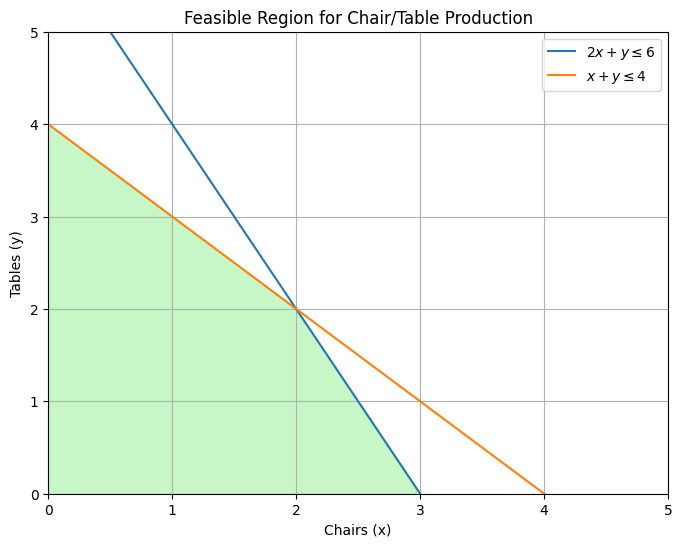

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create x values
x = np.linspace(0, 10, 200)

y1 = 6 - 2*x

y2 = 4 - x

# Plotting
plt.figure(figsize=(8,6))
plt.plot(x, y1, label=r'$2x + y \leq 6$')
plt.plot(x, y2, label=r'$x + y \leq 4$')
plt.xlim((0,5))
plt.ylim((0,5))

# Feasible region
plt.fill_between(x, 0, np.minimum(y1, y2), where=(np.minimum(y1, y2)>=0), color='lightgreen', alpha=0.5)

plt.xlabel('Chairs (x)')
plt.ylabel('Tables (y)')
plt.title('Feasible Region for Chair/Table Production')
plt.legend()
plt.grid(True)
plt.show()


## Part D : Find the vertices of the Feasible Region

From the graph above, the two lines have intersected at (2,2)

The Maximum Profit: $Z = 30(2) + 20(2)$

Which will be : 40 + 60 = $100

# Question 2

A factory produces 3 products: A, B, and C.

Each requires machine hours on 2 machines: M1 and M2.

- Formulate and solve using the Simplex algorithm via scipy.optimize.linprog.
- Determine how many units of A, B, and C to produce to maximize profit.




let;

- $x_1$ -> Number of units of Product A to produce
- $x_2$ -> Number of units of product B to produce
- $x_3$ -> Number of units of product C to produce

The objective function is; 

Mazimize $Z = 40x_1 + 30x_2 + 20x_3$

Constraints;

- Machine M1 hours : $2x_1 + 1x_2 + 1x_3 \leq 100$
- Machine M2 hours : $1x_1 + 2x_2 + 1x_3 \leq 80$
- Non-negativity:  $x_1 ,x_2 , x_3 \geq 0$


In [ ]:
from scipy.optimize import linprog

# Coefficients for the objective function
c = [-40, -30, -20]

# Coefficients for the inequality constraints 
A_ub = [
    [2, 1, 1],   
    [1, 2, 1]    
]

b_ub = [100, 80]

# Solve the LP
res = linprog(c, A_ub=A_ub, b_ub=b_ub, method='highs')

# Display results
if res.success:
    print(f"Optimal number of units to produce:")
    print(f"Product A (x1): {res.x[0]:.2f}")
    print(f"Product B (x2): {res.x[1]:.2f}")
    print(f"Product C (x3): {res.x[2]:.2f}")
    print(f"Maximum Profit: ${-res.fun:.2f}")
else:
    print("Optimization failed:", res.message)


Optimal number of units to produce:
Product A (x1): 40.00
Product B (x2): 20.00
Product C (x3): 0.00
Maximum Profit: $2200.00


# Question 3

A company has 3 factories (S1, S2, S3) and 4 distribution centers (D1, D2, D3, D4).

Supplies:

-  S1: 30 units
-  S2: 40 units
-  S3: 20 units

Demands:

-  D1: 20 units
-  D2: 30 units
-  D3: 25 units
-  D4: 15 units


a) Use the Northwest Corner Method to construct an initial feasible solution
manually or via a custom function in Python.

b) Display the allocation matrix and compute the total transportation cost.



In [ ]:
import numpy as np

# Supplies and Demands
supply = [30, 40, 20]
demand = [20, 30, 25, 15]

# Cost matrix
cost = np.array([
    [8, 6, 10, 9],
    [9, 7, 4, 2],
    [3, 4, 2, 5]
])

# Initialize allocation matrix
allocation = np.zeros_like(cost)

i = 0 
j = 0 

while i < len(supply) and j < len(demand):
    alloc = min(supply[i], demand[j])
    allocation[i][j] = alloc
    supply[i] -= alloc
    demand[j] -= alloc
    
    if supply[i] == 0:
        i += 1  
    elif demand[j] == 0:
        j += 1  

# Calculate total cost
total_cost = np.sum(allocation * cost)

print("Allocation Matrix:")
print(allocation)
print(f"Total Transportation Cost: ${total_cost}")


Allocation Matrix:
[[20 10  0  0]
 [ 0 20 20  0]
 [ 0  0  5 15]]
Total Transportation Cost: $525
